In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim



In [58]:
class CustomRNN(nn.Module):
    def __init__(self):
        super(CustomRNN, self).__init__()
        self.hidden_size = 12
        self.num_layers = 1  # You can adjust the number of layers if needed

        # Define the expansion layer
        self.expand_layer = nn.Linear(in_features=3, out_features=self.hidden_size)

        # Define the RNN layer
        self.rnn = nn.RNN(input_size=self.hidden_size, hidden_size=self.hidden_size, 
                          num_layers=self.num_layers, batch_first=True, nonlinearity='tanh')

        # Define the output layer
        self.fc = nn.Linear(self.hidden_size, 3)

    def forward(self, x):
        # Apply the expansion layer
        x = self.expand_layer(x)
        x = torch.tanh(x)
        
        # Process the sequence through the RNN
        # to get all hidden states, the step function would be needed
        x, self.hidden = self.rnn(x)
        self.x = copy(x.detach())
        # Apply the output layer and tanh activation to the last time step
        x = self.fc(x[:, -1, :])
        x = torch.tanh(x)

        return x

# Example usage
# Assuming batch_size = 1 and seq_length = 5
batch_size = 1
seq_length = 10
model = CustomRNN()
input_seq = torch.randn(batch_size, seq_length, 3)
output = model(input_seq)
print(output)

tensor([[0.1020, 0.3796, 0.3147]], grad_fn=<TanhBackward0>)


In [43]:
def getDataset(howMany,howLong):
    X=[]
    Y=[]
    what=[-1,1]
    for i in range(howMany):
        l=numpy.random.choice(howLong)
        M=numpy.zeros((l,3))
        a=numpy.random.choice([0,1])
        b=numpy.random.choice([0,1])
        c=numpy.random.choice([0,1])
        at=numpy.random.choice(list(range(l-2)))
        bt=numpy.random.choice(list(range(l-2)))
        M[at][0]=what[a]
        M[bt][1]=what[b]
        M[-2][2]=what[c]
        M[-1][2]=what[c]
        X.append(M)
        answer=numpy.zeros((3))
        answer[0]=what[a]
        answer[1]=what[b]
        if c==0:
            answer[2]=what[a^b]
        else:
            answer[2]=what[not(a^b)]
        Y.append(answer)
    return numpy.array(X),numpy.array(Y)
X,Y=getDataset(10,[10])

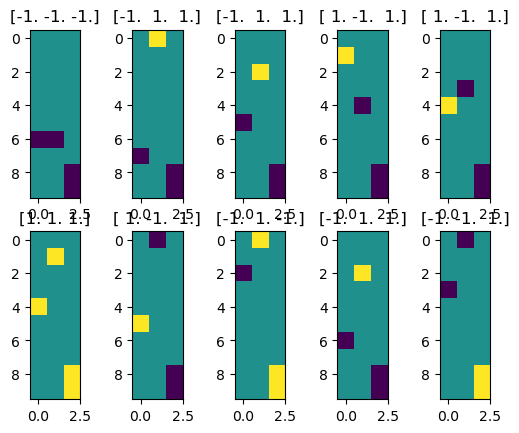

In [12]:
for i in range(10):
    subplot(2,5,i+1)
    imshow(X[i],vmin=-1,vmax=1)
    title(str(Y[i]))

In [ ]:


# Assuming CustomRNN and getDataset are defined

# Initialize the model
model = CustomRNN()

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Assume getDataset returns the input and expected output tensors

# Define number of epochs
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    X, Y = getDataset(100,[10])
    X=torch.Tensor(X)
    Y=torch.Tensor(Y)
    # Zero the gradients
    optimizer.zero_grad()
    
    # Forward pass: Compute predicted y by passing x to the model
    # observe that the getDataset function in the case of [10,20] would not allow you to tranform
    # into a tensor because of the heterogenious length of vectors ... you would need to feed them individually
    # into the model, and then apply the loss for each sequence ...
    Y_pred = model(X)
    
    # Compute the loss
    loss = criterion(Y_pred, Y)
    
    # Backward pass: Compute gradient of the loss with respect to model parameters
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    A=1.0*(Y.detach()>0.0)
    B=1.0*(Y_pred.detach()>0.0)
    acc=(1.0*(A.flatten()==B.flatten())).mean()
    if (epoch%100)==0:
        # Print statistics
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {acc}')


Epoch [1/1000], Loss: 1.0670, Accuracy: 0.5
Epoch [101/1000], Loss: 0.9250, Accuracy: 0.653333306312561
Epoch [201/1000], Loss: 0.5909, Accuracy: 0.7633333206176758
Epoch [301/1000], Loss: 0.2021, Accuracy: 0.9900000095367432
Epoch [401/1000], Loss: 0.0683, Accuracy: 1.0


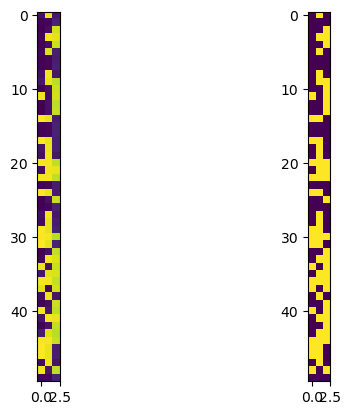

In [38]:
subplot(1,2,1)
imshow(Y_pred.detach(),vmin=-1,vmax=1)
subplot(1,2,2)
imshow(Y,vmin=-1,vmax=1)

In [62]:
model.hidden.shape

torch.Size([1, 50, 12])

In [64]:
X.shape

torch.Size([50, 10, 3])

In [67]:
model.x.shape

(50, 10, 12)

In [68]:
model.x[0]

array([[-0.8115011 ,  0.7231382 , -0.59877867,  0.6753113 , -0.34017465,
         0.7001746 , -0.65868276,  0.8137828 , -0.09758632, -0.58216226,
         0.7761565 , -0.43901142],
       [-0.8120265 ,  0.95032966, -0.49089822, -0.20022567,  0.12179629,
         0.77382666, -0.11932307, -0.36814225, -0.7855941 , -0.9328238 ,
         0.8200314 , -0.32958332],
       [-0.9364089 ,  0.9479859 , -0.70617485, -0.76565045,  0.01856065,
         0.9068777 , -0.07720602, -0.8987733 , -0.9187685 , -0.8743671 ,
         0.7611305 ,  0.19707114],
       [-0.9250172 ,  0.9449276 , -0.6882749 , -0.8577929 , -0.08326482,
         0.93757635, -0.05724894, -0.93986934, -0.9019316 , -0.8309522 ,
         0.75651926,  0.32784352],
       [-0.9132706 ,  0.94190913, -0.6773869 , -0.8650801 , -0.10894327,
         0.93394816, -0.0456436 , -0.9428418 , -0.8847912 , -0.8111456 ,
         0.73170286,  0.31467524],
       [-0.9078505 ,  0.94142747, -0.67625546, -0.8657976 , -0.13688216,
         0.93129253, -

In [69]:
model.x[:,-1,:][0]

array([-0.9910765 ,  0.9547671 , -0.75349206,  0.74618185,  0.72453564,
        0.9366826 , -0.86936015,  0.8605357 , -0.8067383 , -0.9256147 ,
        0.97091633, -0.01725723], dtype=float32)